# load repos

In [1]:
import argparse
import os
import sys
import pandas as pd

repo_path = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(repo_path)

exp_data_fn = "COVID_Moonshot_Takeda_panCorona_enzyme_measurements.csv"
sars2_structures_fn = "/Users/alexpayne/lilac-mount-point/fragalysis/metadata.csv"
sars2_cmpds_fn = "/Users/alexpayne/lilac-mount-point/fragalysis/extra_files/Mpro_compound_tracker_csv.csv"

from covid_moonshot_ml.docking.docking import build_docking_systems,\
    parse_xtal, run_docking

LICENSE: Could not open license file "oe_license.txt" in local directory
LICENSE: N.B. OE_LICENSE environment variable is not set
LICENSE: N.B. OE_DIR environment variable is not set
LICENSE: No product keys!
LICENSE: No product keys!
LICENSE: No product keys!
LICENSE: No product keys!


In [2]:
os.environ['OE_LICENSE'] = "/Users/alexpayne/Scientific_Packages/oe_license_the_laboratory_of_john_chodera_memorial_sloankettering_cancer_center_20200828-16-27-18.txt"

# Load Datasets

In [3]:
sars2_structures = pd.read_csv(sars2_structures_fn)
sars2_structures.head()

,Unnamed: 0,crystal_name,RealCrystalName,smiles,new_smiles,alternate_name,site_name,pdb_entry
0,1,Mpro-x11271_0A,Mpro-x11271,COC=1C=C(Cl)C=C(CC(=O)NC=2C=NC=CC2C)C1,NaN,MAT-POS-c9973a83-1,Aminopyridine-like,NaN
1,2,Mpro-x11041_0A,Mpro-x11041,CN(C(=O)CC=1C=CC=C(Cl)C1)C=2C=NC=CC2C,NaN,JAN-GHE-83b26c96-15,Aminopyridine-like,NaN
2,3,Mpro-x1002_0A,Mpro-x1002,OC=1C=CC=CN1,NaN,AAR-POS-0daf6b7e-37,XChem Screen - xtal contact,5RF4
3,4,Mpro-x10155_0A,Mpro-x10155,CC(N1CCN(Cc2cnc(Cc3ccccc3)s2)CC1)=O,CC(N1CCN(Cc2cnc(Cc3ccccc3)s2)CC1)=O,MED-COV-4280ac29-25,Chloroacetamide,NaN
4,5,Mpro-x1101_1A,Mpro-x1101,CC(C)N(C)C=1N=CN=C2N(C)N=CC12,NaN,AAR-POS-0daf6b7e-40,XChem Screen - xtal contact,5RGR


In [4]:
exp_data = pd.read_csv(exp_data_fn).fillna("")
exp_data

,Molecule Name,Structure,CDD Number,SMILES,Synonyms,Projects,Batch Name,External ID,Catalog number,Pan-coronavirus_enzymatic_Takeda: IC50 SARS-2 Mpro (μM),Pan-coronavirus_enzymatic_Takeda: IC50 SARS-1 Mpro (μM),Pan-coronavirus_enzymatic_Takeda: IC50 229E Mpro (μM),Pan-coronavirus_enzymatic_Takeda: IC50 OC43 Mpro (μM),Pan-coronavirus_enzymatic_Takeda: IC50 MERS Mpro (μM),Pan-coronavirus_enzymatic_Takeda: IC50 HKU1 Mpro (μM),Pan-coronavirus_enzymatic_Takeda: IC50 NL63 Mpro (μM),Pan-coronavirus_enzymatic_Takeda: CatB (μM)
0,CVD-0013146,,CDD-2385615,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,"Feline coronavirus inhibitor, GC376","Compounds_Made, Compounds_for Synthesis, Compo...",1,JOH-MSK-46727e7b-1,Z3006127212,0.064,0.127,0.162,0.094,0.621,0.07,0.387,0.895
1,CVD-0013146,,CDD-2385615,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,"Feline coronavirus inhibitor, GC376","Compounds_Made, Compounds_for Synthesis, Compo...",1,JOH-MSK-46727e7b-1,Z3006127212,0.03,0.044,0.061,0.036,0.282,0.028,0.207,
2,CVD-0014471,,CDD-2563698,Clc1ccc2OCCC3(NC(=O)N(C3=O)c3cncc4ccccc34)c2c1,,"Compounds_Made, Compounds_for Synthesis, Compo...",1,VLA-UCB-29506327-1,Z4780165443,4.56,9.32,3.17,1.88,32.8,1.12,16.3,> 50.0
3,CVD-0013192,,CDD-2386507,Clc1ccc2OCC[C@@H](C(=O)Nc3cncc4ccccc34)c2c1,,"Compounds_Made, Compounds_for Synthesis, Compo...",1,MAT-POS-b3e365b9-1,Z4643752419,0.587,1.44,42.6,13,43.4,8.46,> 50.0,> 50.0
4,CVD-0017398,,CDD-2563906,CS(=O)(=O)N1C[C@@H](C(=O)Nc2cncc3ccccc23)c2cc(...,,"Compounds_Made, Compounds_Virtual",1,MAT-POS-24589f88-3,Z4988872945,0.482,0.643,47.1,5.51,45.1,4.1,> 50.0,> 50.0
5,CVD-0014805,,CDD-2563639,Clc1ccc2NCC[C@@H](C(=O)Nc3cncc4ccccc34)c2c1,,"Compounds_Made, Compounds_for Synthesis, Compo...",1,EDJ-MED-92e193ae-1,Z4878375901,0.575,1.14,46.8,25.9,> 50.0,21.8,> 50.0,> 50.0
6,CVD-0017449,,CDD-2577243,CNC(=O)CN1CC(C(=O)Nc2cncc3ccccc23)c2cc(Cl)ccc2...,,"Compounds_Made, Compounds_for Synthesis, Compo...",1,EDJ-MED-015fb6b4-2,Z5141328966,0.146,0.277,> 50.0,10,> 50.0,9.46,> 50.0,> 50.0
7,CVD-0018217,,CDD-2577251,CS(=O)(=O)Nc1ccc2cncc(NC(=O)C3CCS(=O)(=O)c4ccc...,,"Compounds_Made, Compounds_for Synthesis, Compo...",1,EDJ-MED-d9f3798e-3,Z5115885787,0.527,0.976,> 50.0,11.4,> 50.0,7.54,> 50.0,> 50.0
8,CVD-0016933,,CDD-2577231,Cn1nccc1C(=O)N1CC(C(=O)Nc2cncc3ccccc23)c2cc(Cl...,,"Compounds_Made, Compounds_for Synthesis, Compo...",1,MAT-POS-4223bc15-40,Z4973398677,0.522,0.904,> 50.0,41,> 50.0,28.7,> 50.0,> 50.0
9,CVD-0018215,,CDD-2577250,CS(=O)(=O)Nc1ccc2cncc(NC(=O)C3CNC(=O)c4ccc(Cl)...,,"Compounds_Made, Compounds_for Synthesis, Compo...",1,EDJ-MED-d9f3798e-1,Z5115885784,0.557,1.03,> 50.0,20.4,> 50.0,13.8,> 50.0,> 50.0


# Filter sars2 cmps by mers data

In [5]:
sars2_filtered = sars2_structures[sars2_structures.alternate_name.isin(exp_data['External ID'])]

In [6]:
sars2_filtered

,Unnamed: 0,crystal_name,RealCrystalName,smiles,new_smiles,alternate_name,site_name,pdb_entry
34,35,Mpro-x11612_0A,Mpro-x11612,O=C(Nc1cncc2ccccc12)[C@@H]1CCOc2ccc(Cl)cc21,NaN,MAT-POS-b3e365b9-1,Isoquinoline,NaN
251,252,Mpro-x11790_0A,Mpro-x11790,CN(C)C=1C=CC(=CC1)N(CC=2C=CSC2)C(=O)CC=3C=NC=C...,NaN,PET-UNK-1901c25b-1,Isoquinoline,NaN
302,303,Mpro-x12207_0A,Mpro-x12207,C[C@]1(CCOC=2C=CC(Cl)=CC21)C(=O)NC=3C=NC=C4C=C...,NaN,EDJ-MED-e4b030d8-13,Isoquinoline,NaN
347,348,Mpro-x12692_0A,Mpro-x12692,ClC=1C=CC=2NCC[C@@H](C(=O)NC=3C=NC=C4C=CC=CC34...,CCC(=O)N(C(=O)[C@@H]1CCOC2=C1C=C(Cl)C=C2)C1=C2...,EDJ-MED-92e193ae-1,Isoquinoline,NaN
383,384,Mpro-P0034_0A,Mpro-P0034,ClC=1C=CC=2NCC[C@@H](C(=O)NC=3C=NC=C4C=CC=CC34...,NaN,EDJ-MED-92e193ae-1,Isoquinoline,NaN
417,418,Mpro-P0057_0B,Mpro-P0057,CN(C)C=1C=CC(=NC1)N(CC=2C=CC=C(Cl)C2)C(=O)CC=3...,NaN,MAT-POS-6c284e65-1,Isoquinoline,NaN
418,419,Mpro-P0057_0A,Mpro-P0057,CN(C)C=1C=CC(=NC1)N(CC=2C=CC=C(Cl)C2)C(=O)CC=3...,NaN,MAT-POS-6c284e65-1,Isoquinoline,NaN
438,439,Mpro-P0160_0A,Mpro-P0160,FC=1C=CC=2C=NC=C(NC(=O)[C@@H]3CCOC=4C=CC(Cl)=C...,NaN,EDG-MED-5d232de5-1,Isoquinoline,NaN
442,443,Mpro-P0022_0A,Mpro-P0022,ClC=1C=CC=2OCCC3(NC(=O)N(C3=O)C=4C=NC=C5C=CC=C...,NaN,VLA-UCB-29506327-1,Spirocycle,NaN
443,444,Mpro-P0022_0B,Mpro-P0022,ClC=1C=CC=2OCCC3(NC(=O)N(C3=O)C=4C=NC=C5C=CC=C...,NaN,VLA-UCB-29506327-1,Spirocycle,NaN


In [7]:
len(sars2_filtered)

18

In [8]:
exp_data["External ID"]

0      JOH-MSK-46727e7b-1
1      JOH-MSK-46727e7b-1
2      VLA-UCB-29506327-1
3      MAT-POS-b3e365b9-1
4      MAT-POS-24589f88-3
5      EDJ-MED-92e193ae-1
6      EDJ-MED-015fb6b4-2
7      EDJ-MED-d9f3798e-3
8     MAT-POS-4223bc15-40
9      EDJ-MED-d9f3798e-1
10    MAT-POS-4223bc15-39
11     MAT-POS-61f37a1a-2
12    MAT-POS-4223bc15-14
13     MAT-POS-64942dd0-3
14     EDG-MED-10fcb19e-1
15     EDG-MED-5d232de5-5
16     EDG-MED-5d232de5-1
17    VLA-UCB-05e51b3f-10
18     EDJ-MED-12c115cc-1
19     MAT-POS-6c284e65-1
20     ALP-POS-ce760d3f-1
21     MAT-POS-23a8a11a-1
22     MAT-POS-8a69d52e-6
23     MAT-POS-53907a1c-3
24     ALP-POS-477dc5b7-1
25    EDJ-MED-e4b030d8-13
26     PET-UNK-1901c25b-1
27     EDJ-MED-00c1612e-1
28     ALP-POS-c59291d4-1
29              Leupeptin
Name: External ID, dtype: object

In [9]:
sars2_filtered.alternate_name

34      MAT-POS-b3e365b9-1
251     PET-UNK-1901c25b-1
302    EDJ-MED-e4b030d8-13
347     EDJ-MED-92e193ae-1
383     EDJ-MED-92e193ae-1
417     MAT-POS-6c284e65-1
418     MAT-POS-6c284e65-1
438     EDG-MED-5d232de5-1
442     VLA-UCB-29506327-1
443     VLA-UCB-29506327-1
455     EDJ-MED-00c1612e-1
485     EDJ-MED-015fb6b4-2
490     EDJ-MED-015fb6b4-2
547     EDG-MED-10fcb19e-1
548     EDG-MED-10fcb19e-1
647     VLA-UCB-29506327-1
679    MAT-POS-4223bc15-40
680    MAT-POS-4223bc15-40
Name: alternate_name, dtype: object

# Check what is going on with these ligands

## get smiles strings

In [10]:
exp_smiles = exp_data['SMILES']

In [11]:
exp_smiles

0     CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...
1     CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...
2        Clc1ccc2OCCC3(NC(=O)N(C3=O)c3cncc4ccccc34)c2c1
3           Clc1ccc2OCC[C@@H](C(=O)Nc3cncc4ccccc34)c2c1
4     CS(=O)(=O)N1C[C@@H](C(=O)Nc2cncc3ccccc23)c2cc(...
5           Clc1ccc2NCC[C@@H](C(=O)Nc3cncc4ccccc34)c2c1
6     CNC(=O)CN1CC(C(=O)Nc2cncc3ccccc23)c2cc(Cl)ccc2...
7     CS(=O)(=O)Nc1ccc2cncc(NC(=O)C3CCS(=O)(=O)c4ccc...
8     Cn1nccc1C(=O)N1CC(C(=O)Nc2cncc3ccccc23)c2cc(Cl...
9     CS(=O)(=O)Nc1ccc2cncc(NC(=O)C3CNC(=O)c4ccc(Cl)...
10    Cc1nocc1C(=O)N1CC(C(=O)Nc2cncc3ccccc23)c2cc(Cl...
11    O[C@@H]1CCC[C@H]1S(=O)(=O)N1CC(C(=O)Nc2cncc3cc...
12    Clc1ccc2CN(CC(C(=O)Nc3cncc4ccccc34)c2c1)S(=O)(...
13    CS(=O)(=O)N1CC(C(=O)Nc2cncc3ccccc23)c2cc(Cl)c(...
14    COC1(CCOc2ccc(Cl)cc12)C(=O)Nc1cncc2ccc(NS(C)(=...
15        CN1CC[C@H](C(=O)Nc2cncc3ccccc23)c2cc(Cl)ccc12
16       Fc1ccc2cncc(NC(=O)[C@@H]3CCOc4ccc(Cl)cc34)c2c1
17    Clc1ccc2OCC[C@H](C(=O)N(C(=O)C=C)c3cncc4cc

In [12]:
type(exp_smiles[0])

str

In [13]:
from kinoml.core.ligands import Ligand

In [14]:
from openeye import oechem, oedepict

In [15]:
# mol = oechem.OEGraphMol()
# if oechem.OESmilesToMol(mol, exp_smiles[0]):
#     oedepict.OEPrepareDepiction(mol)
#     oedepict.OE2DMolDisplay(mol)

In [16]:
# from rdkit import Chem
# mols = [Chem.MolFromSmiles(exp_cmp) for exp_cmp in exp_smiles]
# img = Chem.Draw.MolsToGridImage(mols, legends=list(exp_data["Molecule Name"]))
# img

In [17]:
list(exp_data["CDD Number"])

['CDD-2385615',
 'CDD-2385615',
 'CDD-2563698',
 'CDD-2386507',
 'CDD-2563906',
 'CDD-2563639',
 'CDD-2577243',
 'CDD-2577251',
 'CDD-2577231',
 'CDD-2577250',
 'CDD-2577230',
 'CDD-2577098',
 'CDD-2563893',
 'CDD-2577082',
 'CDD-2577233',
 'CDD-2563724',
 'CDD-2563641',
 'CDD-2385720',
 'CDD-2563700',
 'CDD-2563702',
 'CDD-2563699',
 'CDD-2563697',
 '',
 'CDD-2386060',
 'CDD-2386501',
 'CDD-2386500',
 'CDD-2563684',
 'CDD-2563674',
 '',
 'CDD-46369']

# Try different SARS File

In [18]:
sars2_structures = pd.read_csv(sars2_cmpds_fn)
sars2_structures.head()

,Compound ID,Moonshot Series,SMILES,suspected_SMILES,why_suspected_SMILES,ID_for_suspected_SMILES,Rapid Fire IC50,Fluorescence IC50,Library,Shipment,...,Crystals mounted,Datasets collected,Dataset,Fragalysis Site,Fragalysis Link,Ligand Confidence,Ligand CC,Date Last Updated,PDB Code,Zenodo Status
0,AAR-POS-0daf6b7e-1,None,ClCC(=O)N(C1CS(=O)(=O)C=C1)c2ccccc2,CC(=O)N(C1CS(=O)(=O)C=C1)c2ccccc2,Covalent,NaN,NaN,NaN,CovLibrary,CovLib_D1_R1 20 mM,...,6,5,Mpro-x1311,Chloroacetamide,https://fragalysis.diamond.ac.uk/viewer/react/...,"None; 2 - Correct ligand, weak density",None,18/11/2020,5RFG,Deposited
1,AAR-POS-0daf6b7e-10,None,CC(NC(=O)CCl)c1cccc(Cl)c1,CC(NC(=O)C)c1cccc(Cl)c1,Covalent,NaN,NaN,NaN,CovLibrary,CovLib_D1_R1 20 mM,...,5,4,Mpro-x1382,Chloroacetamide,https://fragalysis.diamond.ac.uk/viewer/react/...,1 - Low Confidence; None; 4 - High Confidence,None,12/07/2020,5RFP,Deposited
2,AAR-POS-0daf6b7e-14,None,ClCC(=O)N1CC(c2ccccc2)c3ccccc3C1,CC(=O)N1CC(c2ccccc2)c3ccccc3C1,Covalent,NaN,NaN,NaN,CovLibrary,CovLib_D1_R1 20 mM,...,9,9,Mpro-x1392,Chloroacetamide,https://fragalysis.diamond.ac.uk/viewer/react/...,None; 4 - High Confidence; 1 - Low Confidence,None,12/07/2020,5RFT,Deposited
3,AAR-POS-0daf6b7e-15,None,ClCC(=O)N1CCN(CC1)S(=O)(=O)c2ccc(Cl)s2,CC(=O)N1CCN(CC1)S(=O)(=O)c2ccc(Cl)s2,Covalent,NaN,NaN,NaN,CovLibrary,CovLib_D1_R1 20 mM,...,6,6,Mpro-x1402,Chloroacetamide,https://fragalysis.diamond.ac.uk/viewer/react/...,None; 1 - Low Confidence; 4 - High Confidence,None,12/07/2020,5RFU,Deposited
4,AAR-POS-0daf6b7e-16,None,ClCC(=O)N1CCN(CC1)C(=O)c2cccs2,CC(=O)N1CCN(CC1)C(=O)c2cccs2,Covalent,NaN,NaN,NaN,CovLibrary,CovLib_D1_R1 20 mM,...,4,4,Mpro-x1412,Chloroacetamide,https://fragalysis.diamond.ac.uk/viewer/react/...,"None; 2 - Correct ligand, weak density",None,12/07/2020,5RFV,Deposited


In [19]:
sars2_filtered = sars2_structures[sars2_structures['Compound ID'].isin(exp_data['External ID'])]

In [20]:
sars2_filtered['Compound ID']

204      EDG-MED-10fcb19e-1
205      EDG-MED-5d232de5-1
207      EDG-MED-5d232de5-5
221      EDJ-MED-00c1612e-1
222      EDJ-MED-015fb6b4-2
255      EDJ-MED-92e193ae-1
256      EDJ-MED-92e193ae-1
265     EDJ-MED-e4b030d8-13
377     MAT-POS-4223bc15-40
407      MAT-POS-6c284e65-1
441      MAT-POS-b3e365b9-1
505      PET-UNK-1901c25b-1
572      VLA-UCB-29506327-1
573      VLA-UCB-29506327-1
635      ALP-POS-477dc5b7-1
703      ALP-POS-c59291d4-1
706      ALP-POS-ce760d3f-1
1484     EDJ-MED-12c115cc-1
1610     EDJ-MED-d9f3798e-1
1611     EDJ-MED-d9f3798e-3
1838     JOH-MSK-46727e7b-1
2299     MAT-POS-23a8a11a-1
2309     MAT-POS-24589f88-3
2342    MAT-POS-4223bc15-14
2356    MAT-POS-4223bc15-39
2380     MAT-POS-53907a1c-3
2457     MAT-POS-61f37a1a-2
2465     MAT-POS-64942dd0-3
2510     MAT-POS-8a69d52e-6
3599    VLA-UCB-05e51b3f-10
Name: Compound ID, dtype: object

In [21]:
len(sars2_filtered)

30

In [22]:
len(exp_smiles)

30

## Use this csv to get structures

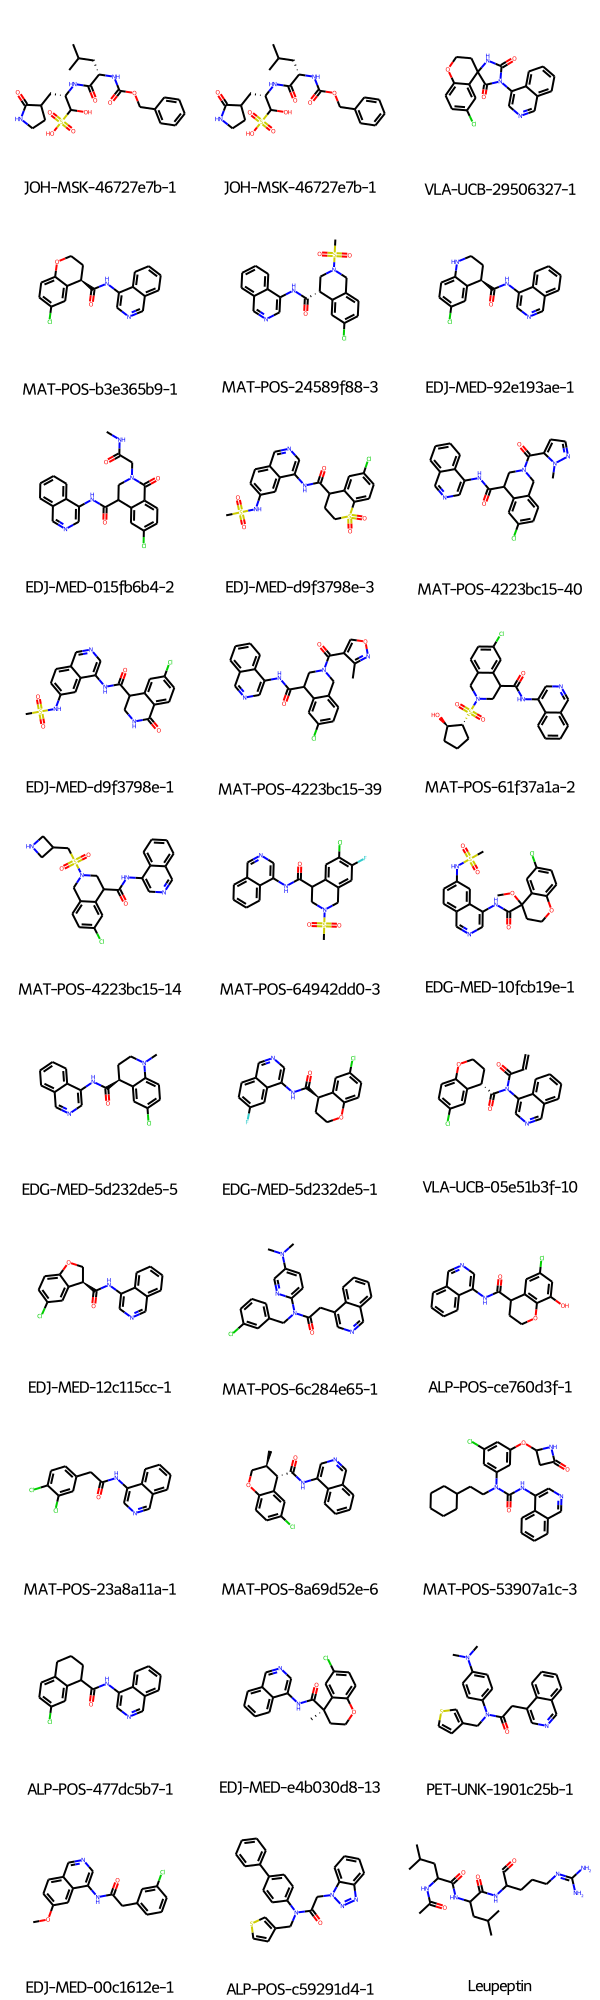

In [23]:
from rdkit import Chem
mols = [Chem.MolFromSmiles(exp_cmp) for exp_cmp in exp_smiles]
img = Chem.Draw.MolsToGridImage(mols, legends=list(exp_data["External ID"]))
img

In [26]:
sars2_filtered

,Compound ID,Moonshot Series,SMILES,suspected_SMILES,why_suspected_SMILES,ID_for_suspected_SMILES,Rapid Fire IC50,Fluorescence IC50,Library,Shipment,...,Crystals mounted,Datasets collected,Dataset,Fragalysis Site,Fragalysis Link,Ligand Confidence,Ligand CC,Date Last Updated,PDB Code,Zenodo Status
204,EDG-MED-10fcb19e-1,3-aminopyridine-like,COC1(CCOC=2C=CC(Cl)=CC21)C(=O)NC=3C=NC=C4C=CC(...,NaN,NaN,NaN,NaN,0.145402,Moonshot,Moonshot_shipment_60,...,2,2,Mpro-P1661,Isoquinoline,https://fragalysis.diamond.ac.uk/viewer/react/...,4 - High Confidence; None,LIG-A-501: 0.896\nLIG-B-501: 0.861; None,17/12/2021,NaN,NaN
205,EDG-MED-5d232de5-1,3-aminopyridine-like,FC=1C=CC=2C=NC=C(NC(=O)[C@@H]3CCOC=4C=CC(Cl)=C...,NaN,NaN,NaN,0.264743,0.322463,Moonshot,Moonshot_shipment_41,...,4,3,Mpro-P0160,Isoquinoline,https://fragalysis.diamond.ac.uk/viewer/react/...,"None; 2 - Correct ligand, weak density",None; LIG-A-404: 0.812,17/12/2021,NaN,NaN
207,EDG-MED-5d232de5-5,3-aminopyridine-like,CN1CC[C@H](C(=O)NC=2C=NC=C3C=CC=CC23)C=4C=C(Cl...,CN1CC[C@@H](C(=O)NC2=CN=CC3=CC=CC=C23)C2=CC(Cl...,Wrong stereochem based on X-ray,EDG-MED-5d232de5-6,0.244122,0.245764,Moonshot,Moonshot_shipment_42,...,2,2,Mpro-P0171,Isoquinoline,https://fragalysis.diamond.ac.uk/viewer/react/...,"2 - Correct ligand, weak density; None",LIG-A-404: 0.787; None,17/12/2021,NaN,NaN
221,EDJ-MED-00c1612e-1,3-aminopyridine-like,COC=1C=CC=2C=NC=C(NC(=O)CC=3C=CC=C(Cl)C3)C2C1,NaN,NaN,NaN,0.549994,0.897800,Moonshot,Moonshot_shipment_23,...,7,6,Mpro-x12777,Isoquinoline,https://fragalysis.diamond.ac.uk/viewer/react/...,None,None; LIG-A-1101: 0.908,04/06/2021,NaN,NaN
222,EDJ-MED-015fb6b4-2,Ugi,CNC(=O)CN1CC(C(=O)NC=2C=NC=C3C=CC=CC23)C=4C=C(...,NaN,NaN,NaN,NaN,0.052977,Moonshot,Moonshot_Shipment_66,...,2,2,Mpro-P1835,Isoquinoline,https://fragalysis.diamond.ac.uk/viewer/react/...,None,LIG-A-501: 0.868\nLIG-B-501: 0.859; LIG-B-403:...,17/12/2021,NaN,NaN
255,EDJ-MED-92e193ae-1,3-aminopyridine-like,ClC=1C=CC=2NCC[C@@H](C(=O)NC=3C=NC=C4C=CC=CC34...,NaN,NaN,NaN,0.180931,0.230226,Moonshot,Moonshot_shipment_38,...,9,9,Mpro-P0034,Isoquinoline,https://fragalysis.diamond.ac.uk/viewer/react/...,None; 4 - High Confidence,LIG-A-1005: 0.932; None; LIG-A-501: 0.886; LIG...,17/12/2021,NaN,NaN
256,EDJ-MED-92e193ae-1,3-aminopyridine-like,ClC=1C=CC=2NCC[C@@H](C(=O)NC=3C=NC=C4C=CC=CC34...,NaN,NaN,NaN,0.180931,0.230226,Moonshot,Moonshot_shipment_38,...,9,9,Mpro-x12692,Isoquinoline,https://fragalysis.diamond.ac.uk/viewer/react/...,None; 4 - High Confidence,LIG-A-1005: 0.932; None; LIG-A-501: 0.886; LIG...,17/12/2021,NaN,NaN
265,EDJ-MED-e4b030d8-13,3-aminopyridine-like,C[C@]1(CCOC=2C=CC(Cl)=CC21)C(=O)NC=3C=NC=C4C=C...,NaN,NaN,NaN,0.090792,0.283626,Moonshot,Moonshot_shipment_29,...,3,2,Mpro-x12207,Isoquinoline,https://fragalysis.diamond.ac.uk/viewer/react/...,None,LIG-A-1101: 0.949; LIG-A-1101: 0.947; None,18/12/2020,NaN,NaN
377,MAT-POS-4223bc15-40,3-aminopyridine-like,CN1N=CC=C1C(=O)N2CC(C(=O)NC=3C=NC=C4C=CC=CC34)...,NaN,NaN,NaN,NaN,0.155670,Moonshot,Moonshot_shipment_54,...,2,2,Mpro-P1079,Isoquinoline,https://fragalysis.diamond.ac.uk/viewer/react/...,4 - High Confidence; None,LIG-A-501: 0.904\nLIG-B-501: 0.794; None,17/12/2021,NaN,NaN
407,MAT-POS-6c284e65-1,3-aminopyridine-like,CN(C)C=1C=CC(=NC1)N(CC=2C=CC=C(Cl)C2)C(=O)CC=3...,NaN,NaN,NaN,0.336773,0.286816,MoonShot,Moonshot_shipment_38,...,21,19,Mpro-P0057,Isoquinoline,https://fragalysis.diamond.ac.uk/viewer/react/...,None; 4 - High Confidence,None; LIG-A-501: 0.882; LIG-A-401: 0.827; LIG-...,17/12/2021,NaN,NaN


In [28]:
common_ids = sars2_filtered["Compound ID"].tolist()

In [29]:
help(pd.Series.to_string)

Help on function to_string in module pandas.core.series:

to_string(self, buf=None, na_rep='NaN', float_format=None, header=True, index=True, length=False, dtype=False, name=False, max_rows=None, min_rows=None)
    Render a string representation of the Series.
    
    Parameters
    ----------
    buf : StringIO-like, optional
        Buffer to write to.
    na_rep : str, optional
        String representation of NaN to use, default 'NaN'.
    float_format : one-parameter function, optional
        Formatter function to apply to columns' elements if they are
        floats, default None.
    header : bool, default True
        Add the Series header (index name).
    index : bool, optional
        Add index (row) labels, default True.
    length : bool, default False
        Add the Series length.
    dtype : bool, default False
        Add the Series dtype.
    name : bool, default False
        Add the Series name if not None.
    max_rows : int, optional
        Maximum number of ro

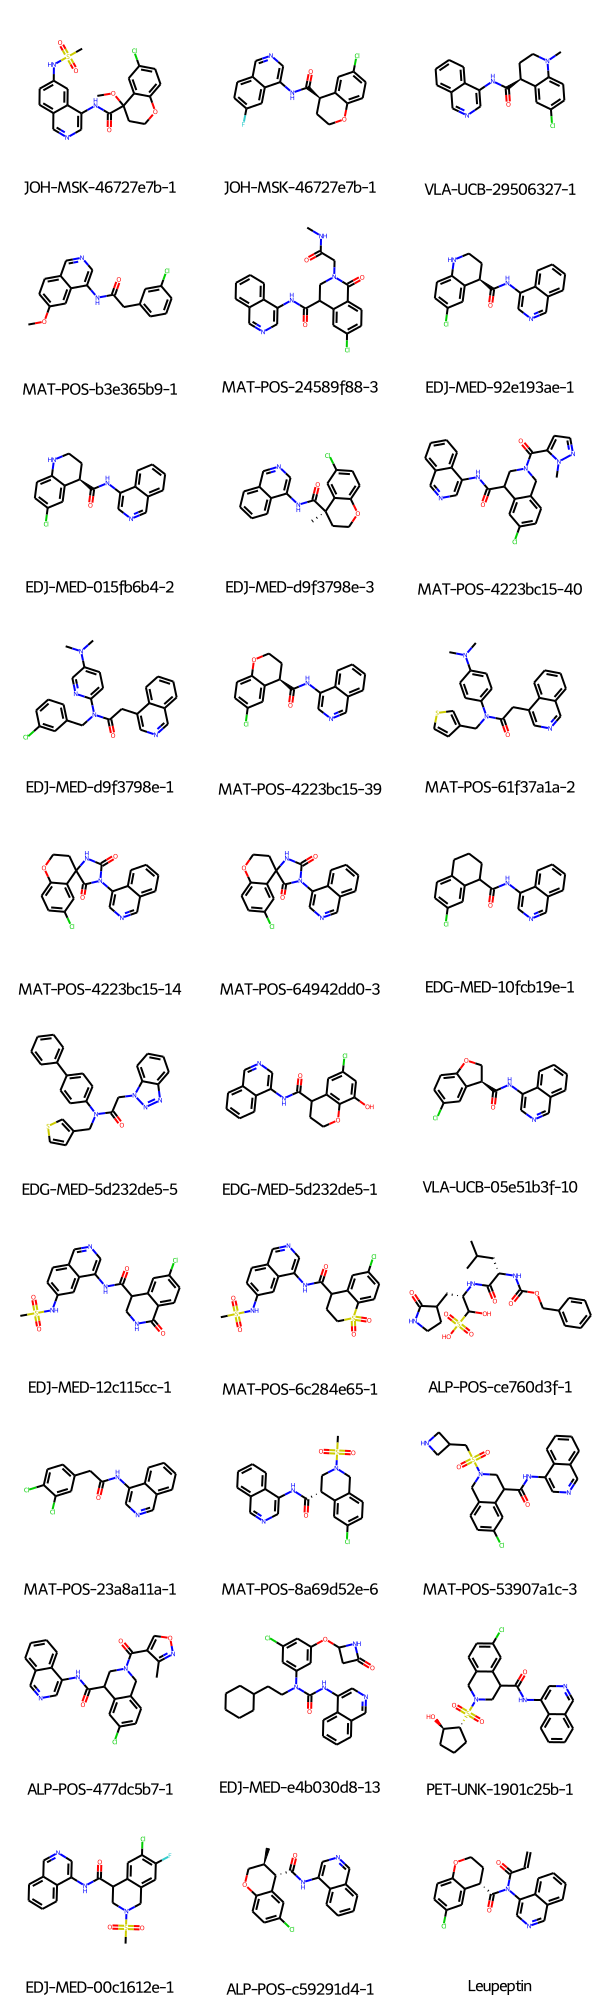

In [30]:
mols = []
for common_id in common_ids:
    smiles = exp_data[exp_data["External ID"] == common_id]["SMILES"].values[0]
    mols.append(Chem.MolFromSmiles(smiles))
img = Chem.Draw.MolsToGridImage(mols, legends=list(exp_data["External ID"]))
img

In [31]:
sars2_strucs = sars2_filtered["Dataset"]

In [32]:
sars2_strucs

204      Mpro-P1661
205      Mpro-P0160
207      Mpro-P0171
221     Mpro-x12777
222      Mpro-P1835
255      Mpro-P0034
256     Mpro-x12692
265     Mpro-x12207
377      Mpro-P1079
407      Mpro-P0057
441     Mpro-x11612
505     Mpro-x11790
572      Mpro-P0022
573     Mpro-x12686
635             NaN
703             NaN
706             NaN
1484            NaN
1610            NaN
1611            NaN
1838            NaN
2299            NaN
2309            NaN
2342            NaN
2356            NaN
2380            NaN
2457            NaN
2465            NaN
2510            NaN
3599            NaN
Name: Dataset, dtype: object

In [ ]:
sum(sars2_strucs.isna())

In [33]:
sars2_strucs.isna()

204     False
205     False
207     False
221     False
222     False
255     False
256     False
265     False
377     False
407     False
441     False
505     False
572     False
573     False
635      True
703      True
706      True
1484     True
1610     True
1611     True
1838     True
2299     True
2309     True
2342     True
2356     True
2380     True
2457     True
2465     True
2510     True
3599     True
Name: Dataset, dtype: bool

In [34]:
mols_wo_sars2_xtal = sars2_filtered[sars2_strucs.isna()][["Compound ID", "SMILES"]]

In [35]:
mols_wo_sars2_xtal

,Compound ID,SMILES
635,ALP-POS-477dc5b7-1,ClC=1C=CC=2CCCC(C(=O)NC=3C=NC=C4C=CC=CC34)C2C1
703,ALP-POS-c59291d4-1,O=C(CN1N=NC=2C=CC=CC12)N(CC=3C=CSC3)C=4C=CC(=C...
706,ALP-POS-ce760d3f-1,OC=1C=C(Cl)C=C2C(CCOC12)C(=O)NC=3C=NC=C4C=CC=CC34
1484,EDJ-MED-12c115cc-1,ClC=1C=CC=2OC[C@@H](C(=O)NC=3C=NC=C4C=CC=CC34)...
1610,EDJ-MED-d9f3798e-1,CS(=O)(=O)NC=1C=CC=2C=NC=C(NC(=O)C3CNC(=O)C=4C...
1611,EDJ-MED-d9f3798e-3,CS(=O)(=O)NC=1C=CC=2C=NC=C(NC(=O)C3CCS(=O)(=O)...
1838,JOH-MSK-46727e7b-1,[Na+].CC(C)C[C@H](NC(=O)OCC=1C=CC=CC1)C(=O)N[C...
2299,MAT-POS-23a8a11a-1,ClC=1C=CC(CC(=O)NC=2C=NC=C3C=CC=CC23)=CC1Cl
2309,MAT-POS-24589f88-3,CS(=O)(=O)N1C[C@@H](C(=O)NC=2C=NC=C3C=CC=CC23)...
2342,MAT-POS-4223bc15-14,ClC=1C=CC=2CN(CC(C(=O)NC=3C=NC=C4C=CC=CC34)C2C...


In [36]:
mols_w_sars2_xtal = sars2_filtered[~sars2_strucs.isna()][["Compound ID", "SMILES", "Dataset"]]

In [37]:
mols_w_sars2_xtal

,Compound ID,SMILES,Dataset
204,EDG-MED-10fcb19e-1,COC1(CCOC=2C=CC(Cl)=CC21)C(=O)NC=3C=NC=C4C=CC(...,Mpro-P1661
205,EDG-MED-5d232de5-1,FC=1C=CC=2C=NC=C(NC(=O)[C@@H]3CCOC=4C=CC(Cl)=C...,Mpro-P0160
207,EDG-MED-5d232de5-5,CN1CC[C@H](C(=O)NC=2C=NC=C3C=CC=CC23)C=4C=C(Cl...,Mpro-P0171
221,EDJ-MED-00c1612e-1,COC=1C=CC=2C=NC=C(NC(=O)CC=3C=CC=C(Cl)C3)C2C1,Mpro-x12777
222,EDJ-MED-015fb6b4-2,CNC(=O)CN1CC(C(=O)NC=2C=NC=C3C=CC=CC23)C=4C=C(...,Mpro-P1835
255,EDJ-MED-92e193ae-1,ClC=1C=CC=2NCC[C@@H](C(=O)NC=3C=NC=C4C=CC=CC34...,Mpro-P0034
256,EDJ-MED-92e193ae-1,ClC=1C=CC=2NCC[C@@H](C(=O)NC=3C=NC=C4C=CC=CC34...,Mpro-x12692
265,EDJ-MED-e4b030d8-13,C[C@]1(CCOC=2C=CC(Cl)=CC21)C(=O)NC=3C=NC=C4C=C...,Mpro-x12207
377,MAT-POS-4223bc15-40,CN1N=CC=C1C(=O)N2CC(C(=O)NC=3C=NC=C4C=CC=CC34)...,Mpro-P1079
407,MAT-POS-6c284e65-1,CN(C)C=1C=CC(=NC1)N(CC=2C=CC=C(Cl)C2)C(=O)CC=3...,Mpro-P0057


In [ ]:
help(parse_xtal)

## try a version of parse_xtal

In [ ]:
from covid_moonshot_ml.schema import CrystalCompoundData

In [ ]:
## Find all P-files
df = mols_w_sars2_xtal
x_dir = "/Users/alexpayne/lilac-mount-point/fragalysis/aligned/"
# idx = [(type(d) is str) and ('-P' in d) for d in df['Dataset']]
idx = [(type(d) is str) for d in df['Dataset']]

## Build argument dicts for the CrystalCompoundData objects
xtal_dicts = [dict(zip(('smiles', 'dataset'), r[1].values)) \
    for r in df.loc[idx,['SMILES', 'Dataset']].iterrows()]

## Add structure filename information
for d in xtal_dicts:
    fn_base = (f'{x_dir}/{d["dataset"]}_0{{}}/{d["dataset"]}_0{{}}_'
        'seqres.pdb')
    fn = fn_base.format('A', 'A')
    if os.path.isfile(fn):
        d['str_fn'] = fn
    else:
        fn = fn_base.format('B', 'B')
        assert os.path.isfile(fn), f'No structure found for {d["dataset"]}.'
        d['str_fn'] = fn

## Build CrystalCompoundData objects for each row
xtal_compounds = [CrystalCompoundData(**d) for d in xtal_dicts]

In [ ]:
len(xtal_compounds)

In [ ]:
xtal_compounds

## but this isn't really what I want, i need to load the mers structures for docking

In [ ]:
from kinoml.features.complexes import OEDockingFeaturizer
from kinoml.core.proteins import Protein
from kinoml.core.ligands import Ligand
from kinoml.core.systems import ProteinLigandComplex
from covid_moonshot_ml.datasets import pdb

def parse_pdb_structs(pdb_list, pdb_dir):
    proteins = []
    
    pdb_fn_list = [os.path.join(pdb_dir, f"{pdb}_aligned_to_frag_ref.pdb") for pdb in pdb_list]
    
    for pdb in pdb_fn_list:
        protein = Protein.from_file(pdb, name='MPRO')
        protein.chain_id = "A"
        proteins.append(protein)
    return proteins

In [ ]:
pdb_list = pdb.load_pdbs_from_yaml("mers-structures.yaml")
proteins = parse_pdb_structs(pdb_list, "/Users/alexpayne/lilac-mount-point/mers-structures/")

In [ ]:
proteins[0].pdb_id

In [ ]:
help(Ligand.from_file)

In [ ]:
def get_ligand_coords_from_sdf(df, db_dir, chain="A"):
    
    fns = [os.path.join(db_dir, f"{dataset}_0{chain}/{dataset}_0{chain}.sdf") for dataset in df["Dataset"].to_list()]
    print(fns)
#     df["sdf"] = df["Datset"]
    
    ligands = [Ligand.from_file(fn, allow_undefined_stereo=True) for fn in fn]
    
    return ligands
    

In [ ]:
get_ligand_coords_from_sdf(mols_w_sars2_xtal, 
                           db_dir = "/Users/alexpayne/lilac-mount-point/fragalysis/aligned/",
                          )

In [ ]:
from openff.toolkit.topology import Molecule
help(Molecule)

In [ ]:
Molecule.from_file('/Users/alexpayne/lilac-mount-point/fragalysis/aligned/Mpro-P1661_0A/Mpro-P1661_0A.sdf',
                  allow_undefined_stereo=True)

In [ ]:
def build_systems(proteins, smiles_df):
    
    smiles = smiles_df
    
    for protein in proteins:
        for ligand in ligands:
            